In [1]:
import numpy as np
import matplotlib.pyplot as plt
import taylorpy as tpy

In [2]:
def matchedfilter(h1,h2,weights,delta_f,freq):
    
    #define time period
    delta_t = 1/(len(h1)*delta_f)
    times = np.linspace(0,len(h1)-1, len(h1))
    
    match = tpy.pyoverlap.InnerProduct(h1,h2,weights,delta_f)*np.exp(2*np.pi*1j*times*freq)
    
    return times, match

def SNR(h1,h2,weights,delta_f,freq):
    
    time,match = matchedfilter(h1,h2,weights,delta_f,freq)
    norm  = (4*delta_f)/(tpy.pyoverlap.sigsq(h1,weights,delta_f))
    
    return match*norm

In [3]:
freq1, waveform1 = tpy.pywaveform.taylorf2(1.4,1.4,df = 1./512)

In [4]:
df = freq1[1]-freq1[0]
weights = np.ones(len(waveform1))

time, match = matchedfilter(waveform1,waveform1,weights,df,freq1)

In [5]:
print(time)
print(match)

[0.00000e+00 1.00000e+00 2.00000e+00 ... 8.18685e+05 8.18686e+05
 8.18687e+05]
[1.22381874e-34+0.00000000e+00j 1.22372659e-34+1.50181385e-36j
 1.22234460e-34+6.00499394e-36j ... 1.21636211e-34+1.34890842e-35j
 1.22234461e-34+6.00497273e-36j 1.22372659e-34+1.50177996e-36j]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


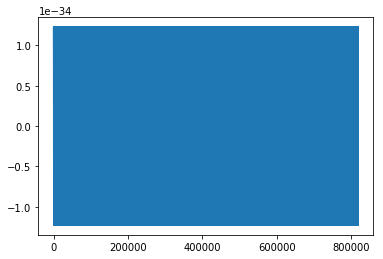

In [6]:
plt.plot(time,match)

In [7]:
SNR1 = SNR(waveform1,waveform1,weights,df,freq1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


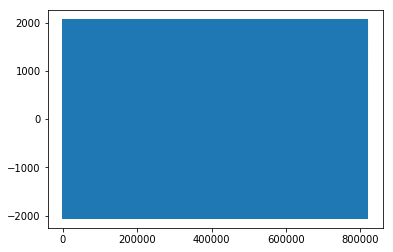

In [10]:
plt.figure()
plt.plot(time,SNR1)